# **Ejercicios de pair programming Módulo 3 Sprint 1**
## **Regresión Logística: Lección 2 - Procesado**
---


Usando el mismo dataset que usatéis ayer, los objetivos de los ejercicios de hoy son:
- Estandarizar las variables numéricas de vuestro set de datos
  
- Codificar las variables categóricas. Recordad que tendréis que tener en cuenta si vuestras variables tienen orden o no.
  
- Chequear si vuestros datos están balanceados. En caso de que no lo estén utilizad algunas de las herramientas aprendidas en la lección para balancearlos.
  
- Guardad el dataframe con los cambios que habéis aplicado para utilizarlo en la siguiente lección.

In [1]:
# Tratamiento de los datos
# ========================
import numpy as np
import pandas as pd

# Librerías para la visualización de los datos
# ============================================
import matplotlib.pyplot as plt
import seaborn as sns

# Estandarización variables numéricas y Codificación variables categóricas
# ========================================================================
from sklearn.preprocessing import RobustScaler

# Gestión datos desbalanceados
# ============================
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from collections import Counter
from sklearn.datasets import make_classification

# Separación de los datos en train y test
# =======================================
from sklearn.model_selection import train_test_split

# Importación de variables y funciones
# ====================================
import sys
sys.path.append('../')
from src import soporte_variables as spv
from src import soporte_funciones as spf

# Configuración de warnings
# =========================
import warnings
warnings.filterwarnings("ignore")

# Establecer preferencias de visualización
# ========================================
plt.rcParams["figure.figsize"] = (20,20)
pd.options.display.max_columns = None 


In [2]:
df = pd.read_pickle("datos/invistico_airline_eda.pkl")
df.head(5)

,satisfaction,gender,customer_type,age,type_of_travel,class,flight_distance,seat_comfort,departure_arrival_time_convenient,food_and_drink,gate_location,inflight_wifi_service,inflight_entertainment,online_support,ease_of_online_booking,onboard_service,leg_room_service,baggage_handling,checkin_service,cleanliness,online_boarding,departure_delay_in_minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,0,2,2,3,4,4,4,2,3,2,310
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,2,0,2,2,3,3,4,4,4,2,0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,3,4,3,1,1,0,1,4,1,3,0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,4,3,4,2,2,0,2,4,2,5,0


### Estandarización de las VPs con Robust Scaler

Optamos por usar el método Robust Scaler porque nuetro dataframe presenta outliers 

In [3]:
# seleccionamos las variables numéricas
df_numericas = df.select_dtypes(include = np.number)
df_numericas.head()

,age,flight_distance,departure_delay_in_minutes
0,65,265,0
1,47,2464,310
2,15,2138,0
3,60,623,0
4,70,354,0


In [4]:

scaler = RobustScaler()

scaler.fit(df_numericas)

X_escaladas = scaler.transform(df_numericas)


df_numericas_estandar = pd.DataFrame(X_escaladas, columns = df_numericas.columns)
df_numericas_estandar.head(2)

,age,flight_distance,departure_delay_in_minutes
0,1.041667,-1.400844,0.000000
1,0.291667,0.454852,25.833333


In [5]:
df.drop(["age", "flight_distance", "departure_delay_in_minutes"], axis = 1, inplace=True)
df.head()

,satisfaction,gender,customer_type,type_of_travel,class,seat_comfort,departure_arrival_time_convenient,food_and_drink,gate_location,inflight_wifi_service,inflight_entertainment,online_support,ease_of_online_booking,onboard_service,leg_room_service,baggage_handling,checkin_service,cleanliness,online_boarding
0,satisfied,Female,Loyal Customer,Personal Travel,Eco,0,0,0,2,2,4,2,3,3,0,3,5,3,2
1,satisfied,Male,Loyal Customer,Personal Travel,Business,0,0,0,3,0,2,2,3,4,4,4,2,3,2
2,satisfied,Female,Loyal Customer,Personal Travel,Eco,0,0,0,3,2,0,2,2,3,3,4,4,4,2
3,satisfied,Female,Loyal Customer,Personal Travel,Eco,0,0,0,3,3,4,3,1,1,0,1,4,1,3
4,satisfied,Female,Loyal Customer,Personal Travel,Eco,0,0,0,3,4,3,4,2,2,0,2,4,2,5


In [6]:
df = pd.concat([df, df_numericas_estandar], axis = 1)
df.head()

,satisfaction,gender,customer_type,type_of_travel,class,seat_comfort,departure_arrival_time_convenient,food_and_drink,gate_location,inflight_wifi_service,inflight_entertainment,online_support,ease_of_online_booking,onboard_service,leg_room_service,baggage_handling,checkin_service,cleanliness,online_boarding,age,flight_distance,departure_delay_in_minutes
0,satisfied,Female,Loyal Customer,Personal Travel,Eco,0,0,0,2,2,4,2,3,3,0,3,5,3,2,1.041667,-1.400844,0.000000
1,satisfied,Male,Loyal Customer,Personal Travel,Business,0,0,0,3,0,2,2,3,4,4,4,2,3,2,0.291667,0.454852,25.833333
2,satisfied,Female,Loyal Customer,Personal Travel,Eco,0,0,0,3,2,0,2,2,3,3,4,4,4,2,-1.041667,0.179747,0.000000
3,satisfied,Female,Loyal Customer,Personal Travel,Eco,0,0,0,3,3,4,3,1,1,0,1,4,1,3,0.833333,-1.098734,0.000000
4,satisfied,Female,Loyal Customer,Personal Travel,Eco,0,0,0,3,4,3,4,2,2,0,2,4,2,5,1.250000,-1.325738,0.000000


### Codificación con datos estandarizados ###


- Variables que tienen orden:

In [7]:
ordinales = df.select_dtypes(include='object')
ordinales = ordinales.drop(columns='satisfaction')
ordinales.sample()

,gender,customer_type,type_of_travel,class,seat_comfort,departure_arrival_time_convenient,food_and_drink,gate_location,inflight_wifi_service,inflight_entertainment,online_support,ease_of_online_booking,onboard_service,leg_room_service,baggage_handling,checkin_service,cleanliness,online_boarding
39058,Male,Loyal Customer,Personal Travel,Eco,5,4,5,2,1,5,1,1,2,1,2,3,4,1


In [8]:
# creamos los mapas para cada columna
gender_map = {'Female': 0, 'Male': 1}
cutomer_type_map = {'disloyal Customer': 0, 'Loyal Customer': 1}
type_travel_map = {'Personal Travel': 0, 'Business travel': 1}
class_map = {'Eco Plus': 0, 'Business': 1, 'Eco': 2}
seat_comfort_map = {0: 0, 5: 0, 4: 1, 1: 2, 2: 3, 3: 3}
dep_convenient_map = {0: 0, 1: 1, 2: 2, 3: 2, 5: 3, 4: 3}
food_drink_map = {0: 0, 5: 1, 1: 2, 4: 3, 2: 4, 3: 4}
gate_map = {0: 0, 5: 1, 1: 2, 2: 3, 4: 4, 3: 5}
wifi_map = {0: 0, 4: 1, 5: 1, 1: 2, 2: 3, 3: 3}
entertainment_map = {0: 0, 5: 1, 1: 2, 4:3, 2: 4, 3: 4}
online_support_map = {0: 0, 5: 1, 1: 2, 2: 2, 4: 3, 3: 4}
booking_map = {0: 0, 5: 1, 4: 2, 1: 3, 2: 4, 3: 4}
onboard_map = {0: 0, 5: 1, 1: 2, 2: 2, 4: 3, 3: 4}
leg_room_map = {0: 0, 1: 1, 5: 2, 4: 3, 2: 4, 3: 4}
baggage_map = {0: 0, 1: 1, 2: 2, 5: 3, 3: 4, 4: 5}
checkin_map = {0: 0, 5: 1, 1: 2, 2: 2, 3: 3, 4: 3}
cleanliness_map = {0: 0, 1: 1, 2: 2, 5: 3, 3: 4, 4: 5}
boarding_map = {0: 0, 5: 1, 4: 2, 1: 3, 2: 3, 3: 4}

Lista_maps = [gender_map, cutomer_type_map, type_travel_map, class_map, seat_comfort_map, dep_convenient_map, food_drink_map, gate_map, wifi_map, entertainment_map, 
              online_support_map, booking_map, onboard_map, leg_room_map, baggage_map, checkin_map, cleanliness_map, boarding_map]

In [9]:
df.head()

,satisfaction,gender,customer_type,type_of_travel,class,seat_comfort,departure_arrival_time_convenient,food_and_drink,gate_location,inflight_wifi_service,inflight_entertainment,online_support,ease_of_online_booking,onboard_service,leg_room_service,baggage_handling,checkin_service,cleanliness,online_boarding,age,flight_distance,departure_delay_in_minutes
0,satisfied,Female,Loyal Customer,Personal Travel,Eco,0,0,0,2,2,4,2,3,3,0,3,5,3,2,1.041667,-1.400844,0.000000
1,satisfied,Male,Loyal Customer,Personal Travel,Business,0,0,0,3,0,2,2,3,4,4,4,2,3,2,0.291667,0.454852,25.833333
2,satisfied,Female,Loyal Customer,Personal Travel,Eco,0,0,0,3,2,0,2,2,3,3,4,4,4,2,-1.041667,0.179747,0.000000
3,satisfied,Female,Loyal Customer,Personal Travel,Eco,0,0,0,3,3,4,3,1,1,0,1,4,1,3,0.833333,-1.098734,0.000000
4,satisfied,Female,Loyal Customer,Personal Travel,Eco,0,0,0,3,4,3,4,2,2,0,2,4,2,5,1.250000,-1.325738,0.000000


In [10]:
# aplicamos los mapas
for indice, col in enumerate(ordinales.columns):
    df[col] = df[col].map(Lista_maps[indice])

In [11]:
# comprobamos que ha ido bien
df.head()

,satisfaction,gender,customer_type,type_of_travel,class,seat_comfort,departure_arrival_time_convenient,food_and_drink,gate_location,inflight_wifi_service,inflight_entertainment,online_support,ease_of_online_booking,onboard_service,leg_room_service,baggage_handling,checkin_service,cleanliness,online_boarding,age,flight_distance,departure_delay_in_minutes
0,satisfied,0,1,0,2,0,0,0,3,3,3,2,4,4,0,4,1,4,3,1.041667,-1.400844,0.000000
1,satisfied,1,1,0,1,0,0,0,5,0,4,2,4,3,3,5,2,4,3,0.291667,0.454852,25.833333
2,satisfied,0,1,0,2,0,0,0,5,3,0,2,4,4,4,5,3,5,3,-1.041667,0.179747,0.000000
3,satisfied,0,1,0,2,0,0,0,5,3,3,4,3,2,0,1,3,1,4,0.833333,-1.098734,0.000000
4,satisfied,0,1,0,2,0,0,0,5,1,4,3,4,2,0,2,3,2,1,1.250000,-1.325738,0.000000


In [12]:
# comprobamos que no hay nulos
df.isnull().sum()

satisfaction                         0
gender                               0
customer_type                        0
type_of_travel                       0
class                                0
seat_comfort                         0
departure_arrival_time_convenient    0
food_and_drink                       0
gate_location                        0
inflight_wifi_service                0
inflight_entertainment               0
online_support                       0
ease_of_online_booking               0
onboard_service                      0
leg_room_service                     0
baggage_handling                     0
checkin_service                      0
cleanliness                          0
online_boarding                      0
age                                  0
flight_distance                      0
departure_delay_in_minutes           0
dtype: int64

### Codificación variable respuesta

Para evitar problemas más adelante codificamos la variable respuesta a 0 y 1.

In [13]:
mapa_vr = {'dissatisfied': 0, 'satisfied': 1}
df['satisfaction'] = df['satisfaction'].map(mapa_vr)
df.sample()

,satisfaction,gender,customer_type,type_of_travel,class,seat_comfort,departure_arrival_time_convenient,food_and_drink,gate_location,inflight_wifi_service,inflight_entertainment,online_support,ease_of_online_booking,onboard_service,leg_room_service,baggage_handling,checkin_service,cleanliness,online_boarding,age,flight_distance,departure_delay_in_minutes
92209,1,0,1,1,1,2,1,2,2,3,3,1,2,3,3,5,3,5,1,0.666667,-1.302954,0.0


### Comprobación del balanceo

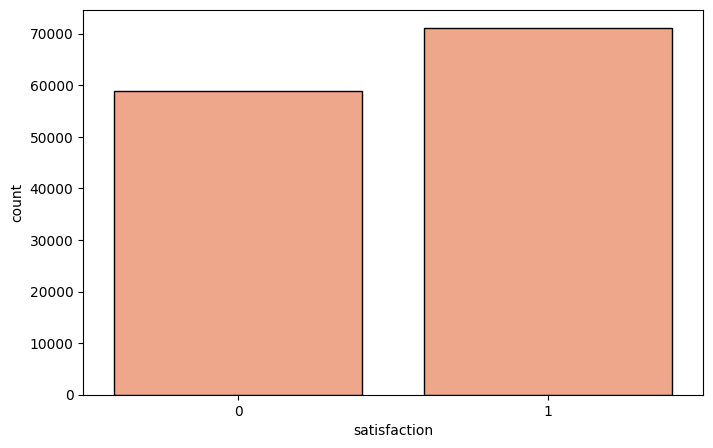

In [14]:
# ploteamos el número de registros de cada categoría de la variable respuesta
plt.figure(figsize=(8,5)) 

sns.countplot(data = df, x = "satisfaction",  color = "lightsalmon",  edgecolor='black')

plt.show();

In [15]:
# lo sacamos en porcentaje
df["satisfaction"].value_counts() * 100 / df.shape[0]

1    54.73283
0    45.26717
Name: satisfaction, dtype: float64

Los datos están bastante balanceados, por lo que no haría falta realizar un proceso de balanceado pero vamos a realizarlo para poder comparar los datos del modelo con datos balanceados y sin balancear.

### Balanceo usando el método SMOTETomek()

In [16]:
# Separamos en X e y
y = df['satisfaction']
X = df.drop('satisfaction', axis=1)

In [17]:
# iniciamos el método
os_us = SMOTETomek()
# ajustamos el modelo
X_res, y_res = os_us.fit_resample(X, y)

In [18]:
# comprobemos como han quedado ahora las categorías después del ajuste
print (f"Distribution before resampling \n {y.value_counts()}" )
print("..............................................................")
print (f"Distribución después del ajuste \n {y_res.value_counts()}")

Distribution before resampling 
 1    71087
0    58793
Name: satisfaction, dtype: int64
..............................................................
Distribución después del ajuste 
 1    69719
0    69719
Name: satisfaction, dtype: int64


In [19]:
# juntamos los datos balanceado en un dataframe
df_balanceado = pd.concat([X_res, y_res], axis = 1)
df_balanceado.head()

,gender,customer_type,type_of_travel,class,seat_comfort,departure_arrival_time_convenient,food_and_drink,gate_location,inflight_wifi_service,inflight_entertainment,online_support,ease_of_online_booking,onboard_service,leg_room_service,baggage_handling,checkin_service,cleanliness,online_boarding,age,flight_distance,departure_delay_in_minutes,satisfaction
0,0,1,0,2,0,0,0,3,3,3,2,4,4,0,4,1,4,3,1.041667,-1.400844,0.000000,1
1,1,1,0,1,0,0,0,5,0,4,2,4,3,3,5,2,4,3,0.291667,0.454852,25.833333,1
2,0,1,0,2,0,0,0,5,3,0,2,4,4,4,5,3,5,3,-1.041667,0.179747,0.000000,1
3,0,1,0,2,0,0,0,5,3,3,4,3,2,0,1,3,1,4,0.833333,-1.098734,0.000000,1
4,0,1,0,2,0,0,0,5,1,4,3,4,2,0,2,3,2,1,1.250000,-1.325738,0.000000,1


In [20]:
df_balanceado.isnull().sum()

gender                               0
customer_type                        0
type_of_travel                       0
class                                0
seat_comfort                         0
departure_arrival_time_convenient    0
food_and_drink                       0
gate_location                        0
inflight_wifi_service                0
inflight_entertainment               0
online_support                       0
ease_of_online_booking               0
onboard_service                      0
leg_room_service                     0
baggage_handling                     0
checkin_service                      0
cleanliness                          0
online_boarding                      0
age                                  0
flight_distance                      0
departure_delay_in_minutes           0
satisfaction                         0
dtype: int64

### Guardado de los datos

In [21]:
df.to_pickle("datos/invistico_airline_encoding.pkl")
df_balanceado.to_pickle("datos/invistico_airline_encod_balance.pkl")